#########################################################################
MoRed - GeM Laboratory
ECOLE CENTRALE DE NANTES
#########################################################################

In [ ]:
import numpy as np
import os
from matplotlib import pyplot as plt
from matplotlib.tri import Triangulation

LOAD MESH DATA, FE AND ROM SOLUTIONS

In [ ]:
X = np.loadtxt('FEM_Solution/X.txt', delimiter=',')
Y = np.loadtxt('FEM_Solution/Y.txt', delimiter=',')
connectAll = np.loadtxt('FEM_Solution/connectAll.txt', delimiter=',', dtype=int)
time = np.loadtxt('FEM_Solution/time.txt', delimiter=',')
fem_solution = np.loadtxt('FEM_Solution/solution.txt', delimiter=',')
rom_solution = np.loadtxt('ROM_Solution/rom_solution.txt', delimiter=',')

COMPUTE ERROR

In [ ]:
variable = abs(fem_solution - rom_solution)
error = np.linalg.norm(variable, axis=0)

PLOT ERROR vs. TIME

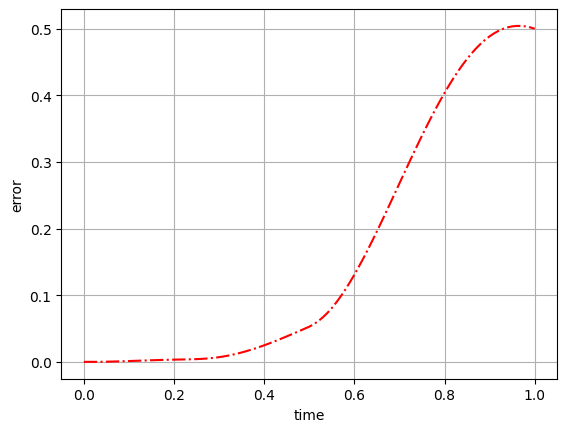

In [ ]:
os.makedirs('error_plots/', exist_ok=True)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time,error, linestyle='dashdot', color='r')
ax.grid()
ax.set_xlabel('time')
ax.set_ylabel('error')
fig.savefig('error_plots/ROMerror_vs_time.png')

PLOT 3D ERROR vs. SPACE-TIME  (Dynamic plots may not work on notebooks/deepnote. In that case, visualize the solution using the saved (png) figures)

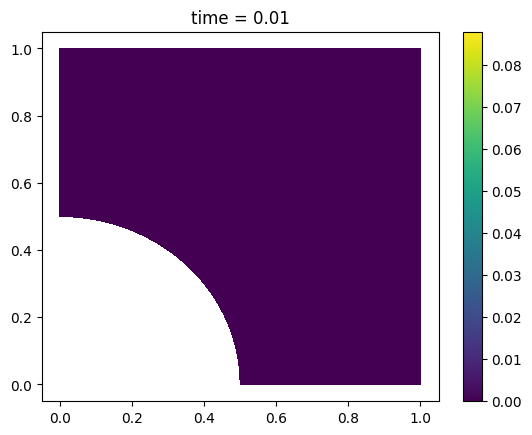

In [ ]:
numOfFrames = time.size
fig = plt.figure()
ax = fig.add_subplot(111)
variable2plot = variable[:,0]
vmin = 0.9*variable.min()
vmax = 1.1*variable.max()

if connectAll.shape[1]==4:
    f1 = ax.pcolormesh([X, Y], variable2plot, vmin=vmin, vmax=vmax)
    ax.set_title(f'time = {time[0]:0.2f}')
    fig.colorbar(f1, ax=ax)
    for i in range(1, numOfFrames):
        variable2plot = variable[:,i]
        f1.set_array(variable2plot)
        ax.set_title(f'time = {time[i]:0.2f}')
        if ((i%int(numOfFrames/10))==0) | (i==numOfFrames-1):
            fig.savefig(f'error_plots/SolAtTime={time[i]:0.2f}.png')
        plt.pause(5/numOfFrames)
elif connectAll.shape[1]==3:
    Tri = Triangulation(X, Y, triangles=connectAll)
    f1 = ax.tripcolor(Tri, variable2plot, vmin=vmin, vmax=vmax)
    ax.set_title(f'time = {time[0]:0.2f}')
    fig.colorbar(f1, ax=ax)
    for i in range(1, numOfFrames):
        variable2plot = variable[:,i]
        f1 = ax.tripcolor(Tri, variable2plot, vmin=vmin, vmax=vmax)
        ax.set_title(f'time = {time[i]:0.2f}')
        if ((i%int(numOfFrames/10))==0) | (i==numOfFrames-1):
            fig.savefig(f'error_plots/SolAtTime={time[i]:0.2f}.png')
        plt.pause(5/numOfFrames)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6e4ec535-1a42-4f7f-9f57-76554989f508' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>